In [1]:
import pandas as pd

titanic1_df = pd.read_csv('./b_Classifier/datasets/titanic_test.csv')
titanic2_df = pd.read_csv('./b_Classifier/datasets/titanic_train.csv')
titanic_df = pd.concat([titanic1_df, titanic2_df], axis=0)
titanic_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [2]:
titanic_df.drop('Name', axis=1, inplace=True)
titanic_df.drop('Ticket', axis=1, inplace=True)
titanic_df.drop('PassengerId', axis=1, inplace=True)

In [3]:
# 결측치
# Age 중앙값
age_median = titanic_df['Age'].median()
titanic_df['Age'].fillna(age_median, inplace=True)

# Embarked 최빈값
embarked_mode = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(embarked_mode, inplace=True)

# Cabin Cabin이 있으면 1 없으면 0
titanic_df['HCabin'] = titanic_df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
titanic_df.drop(columns=['Cabin'], inplace=True)  # 원래의 Cabin 칼럼 제거

# Fare 중앙값
fare_median = titanic_df['Fare'].median()
titanic_df['Fare'].fillna(fare_median, inplace=True)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  891 non-null    float64
 8   HCabin    1309 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

# 타이타닉 데이터셋에서 문자열 칼럼들 선택
obj_columns = ['Sex', 'HCabin', 'Embarked']
encoders = {}

# 각 칼럼에 대해 LabelEncoder 적용
for column in obj_columns:
    # 결측치 처리 (LabelEncoder는 결측치를 처리할 수 없으므로 'Unknown'으로 대체)
    titanic_df[column].fillna('Unknown', inplace=True)
    
    encoder = LabelEncoder()
    titanic_df[column] = encoder.fit_transform(titanic_df[column].tolist())
    encoders[column] = encoder  # 각 encoder 저장
    print(f'{column} classes:', encoder.classes_)


Sex classes: ['female' 'male']
HCabin classes: [0 1]
Embarked classes: ['C' 'Q' 'S']


In [6]:
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: >

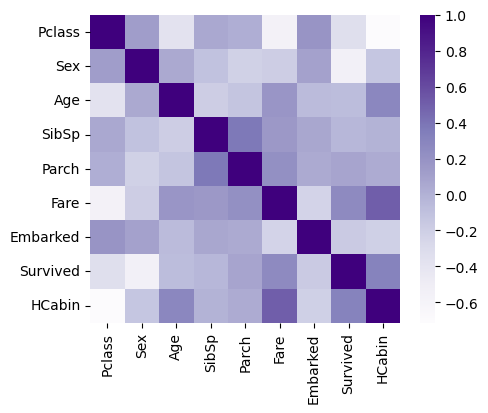

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 데이터만 선택하여 상관계수 계산
numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

fig = plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, cmap="Purples")


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>],
       [<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'HCabin'}>, <Axes: >]], dtype=object)

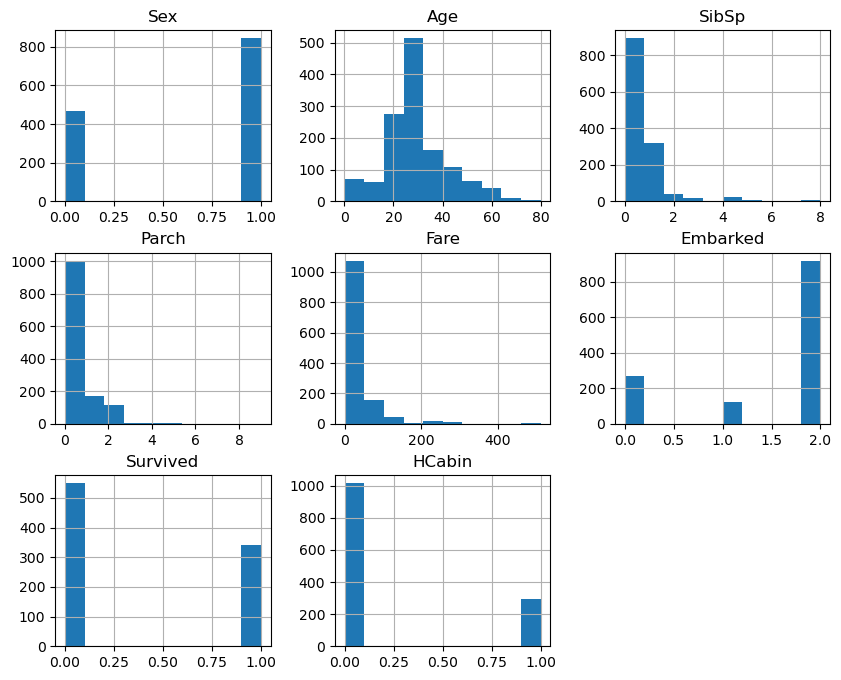

In [8]:
titanic_df.iloc[:, 1:].hist(figsize=(10, 8))

In [9]:
# 트레이닝 데이터와 테스트 데이터로 분리
train_df = titanic_df.dropna(subset=['Survived'])
test_df = titanic_df[titanic_df['Survived'].isnull()].drop(columns=['Survived'])

# 트레이닝 데이터에서 특성과 목표 변수 분리
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']

# # 테스트 데이터에서 특성만 추출 (목표 변수는 없음)
# X_test = test_df.drop(columns=['PassengerId'])

test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HCabin
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,0
...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,2,0
414,1,0,39.0,0,0,108.9000,0,1
415,3,1,38.5,0,0,7.2500,2,0
416,3,1,28.0,0,0,8.0500,2,0


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 튜닝
dt_params = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
# 개별 모델 정의
grid_dt_classifier = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv=5, refit=True, return_train_score=True, n_jobs=4, error_score='raise')
# 소프트 보팅에서는 각 결정 클래스별 확률이 필요하기 때문에, SVC에 probability를 True로 하여
# predict_proba()를 사용할 수 있도록 해준다(허은상 도움).
grid_svc_classifier = GridSearchCV(SVC(probability=True), param_grid=svm_params, cv=5, refit=True, return_train_score=True, n_jobs=4, error_score='raise')
# KNN에서 Flag오류 발생
# Series 타입의 훈련 데이터에는 flags 속성이 없기 때문에, numpy로 변경한 뒤 훈련시켜야 한다.
grid_knn_classifier = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, refit=True, return_train_score=True, n_jobs=4, error_score='raise')


# VotingClassifier 정의
voting_classifier = VotingClassifier(estimators=[('DTC', grid_dt_classifier)
                                                 , ('SVC', grid_svc_classifier)
                                                 , ('KNN', grid_knn_classifier)]
                                     , voting='soft')
# 훈련 데이터를 사용하여 앙상블 모델 훈련
voting_classifier.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
test_predictions = voting_classifier.predict(test_df)


In [12]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [13]:
# 개별 모델의 학습/예측/평가.
classifiers = [grid_dt_classifier, grid_svc_classifier, grid_knn_classifier]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    prediction = classifier.predict(X_test)
    class_name= classifier.best_estimator_.__class__.__name__
    print(f'# {class_name}')
    get_evaluation(y_test, prediction, classifier, X_test)

NameError: name 'X_test' is not defined